# FLOSS Education Impact

In [1]:
import matplotlib.pyplot as plt
from github import Github
from getpass import getpass
import numpy as np
import pickle

In [2]:
token = getpass()
g = Github(token)

········


In [3]:
mdseps = g.get_organization("fga-eps-mds")
repos = mdseps.get_repos()

In [13]:
issuetime_per_repo = {}
total_data_per_repo = {}

def is_blacklisted(name):
    blacklisted_semesters = ['2016.1', '2019.2']
    for semester in blacklisted_semesters:
        if semester in name:
            return True
    return False

for repo in repos:
    if not is_blacklisted(repo.name):
        try:
            with open('data/{0}.pickle'.format(repo.name), 'rb') as f:
                data = pickle.load(f)
                total_data_per_repo[repo.name] = data
                
                total_count = 0
                total_time = 0
                
                for issue in total_data_per_repo[repo.name]['issues']:
                    issue = issue['obj']
                    total_count += 1
                    delta = (issue.closed_at - issue.created_at)
                    total_time += delta.seconds/3600

                if total_count != 0:
                    issuetime_per_repo[repo.name] = total_time/total_count

        except FileNotFoundError:    
            total_data_per_repo[repo.name] = {
                'issues': [],
            }
            issues = repo.get_issues(state='closed')
            total_time = 0
            total_count = 0
            for issue in issues:
                comments = issue.get_comments()
                total_data_per_repo[repo.name]['issues'].append({
                    'obj': issue,
                    'comments':[comment for comment in comments]
                })
                total_count += 1
                delta = (issue.closed_at - issue.created_at)
                total_time += delta.seconds/3600

            if total_count != 0:
                issuetime_per_repo[repo.name] = total_time/total_count

            with open('data/{0}.pickle'.format(repo.name), 'wb') as f:
                pickle.dump(total_data_per_repo[repo.name], f, pickle.HIGHEST_PROTOCOL)

In [14]:
del issuetime_per_repo['A-Disciplina']

issuetime_per_repo['2016.1-Owla'] = issuetime_per_repo['Owla']
del issuetime_per_repo['Owla']

issuetime_per_repo['2017.2-fisCAE'] = issuetime_per_repo['fisCAE-2017-2']
del issuetime_per_repo['fisCAE-2017-2']

issuetime_per_repo

{'2016.2-WikiLegis': 8.549548611111112,
 '2016.2-MissaoNascente': 8.08020947176685,
 '2016.2-Observatorio-de-Residuos-Frontend': 5.5486265432098785,
 '2016.2-SAS_FGA': 9.35678012519562,
 '2016.2-Jardim-Botanico-Web': 9.92263888888889,
 '2016.2-SME_UnB': 7.722578616352198,
 '2016.2-CidadeDemocratica': 7.119016516516516,
 '2016.2-SAAP': 1.2549666666666668,
 '2016.2-Observatorio-de-Residuos-Backend': 3.157026143790849,
 '2017.1-PlataformaJogosUnB': 9.071996632996633,
 '2017.1-Trezentos': 10.434939939939936,
 '2017.1-Forum-Coordenadores-DEG': 11.170503812636161,
 '2017.1-Escola-X': 6.749613010446344,
 '2017.1-SIGS': 5.816900966183579,
 '2017.1-Cadernos-API': 6.505497985031662,
 '2017.1-OndeE-UnB': 7.047137681159416,
 '2017.1-Trezentos-RestAPI': 0.0016666666666666668,
 '2017.1-DEG-API': 2.4651666666666663,
 '2017.1-Cadernos-APP': 5.54661111111111,
 '2017.2-AjudaConselheiro-Backend': 2.771587301587302,
 '2017.2-Receita-Mais': 7.012987147595351,
 '2017.2-MerendaMais': 8.941276830808077,
 '201

In [6]:
semesters = {}
blacklisted_semesters = ['2016.1', '2019.2']
for repo_name in issuetime_per_repo:
    if not repo_name[:6] in blacklisted_semesters:
        if repo_name[:6] in semesters:
            semesters[repo_name[:6]].append(issuetime_per_repo[repo_name])
        else:
            semesters[repo_name[:6]] = [issuetime_per_repo[repo_name]]

avg_closing_time_per_semester = []

for semester in semesters:
    total_delta = 0
    for delta in semesters[semester]:
        total_delta += delta
        
    avg_delta = total_delta/len(semesters[semester])
    avg_closing_time_per_semester.append(
        {
            'id': semester,
            'value': avg_delta
        }
    )
    
avg_closing_time_per_semester = sorted(
    avg_closing_time_per_semester,
    key=lambda x: x['id'])

delta_time_series = [sem['value'] for sem in avg_closing_time_per_semester]
semester_time_series = [sem['id'] for sem in avg_closing_time_per_semester]

Text(0.5, 1.0, 'Average time to close issue by semester')

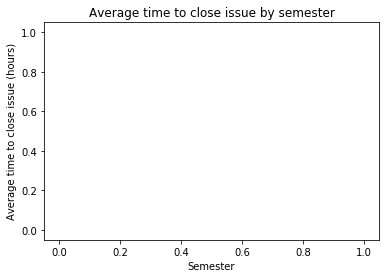

In [7]:
plt.plot(
    semester_time_series,
    delta_time_series
)
plt.xlabel('Semester')
plt.ylabel('Average time to close issue (hours)')
plt.title('Average time to close issue by semester')

In [8]:
semesters = {}
blacklisted_semesters = ['2016.1', '2019.2']
for repo_name in issuetime_per_repo:
    if not repo_name[:6] in blacklisted_semesters:
        if repo_name[:6] in semesters:
            semesters[repo_name[:6]].append({'name': repo_name[7:], 'value':issuetime_per_repo[repo_name]})
        else:
            semesters[repo_name[:6]] = [{'name': repo_name[7:], 'value':issuetime_per_repo[repo_name]}]

avg_closing_time_per_semester = []

for semester in semesters:
    for repo in semesters[semester]:        
        avg_closing_time_per_semester.append(
            {
                'id': semester,
                'value': repo['value'],
                'repo': repo['name']
            }
        )
        
avg_closing_time_per_semester = sorted(
    avg_closing_time_per_semester,
    key=lambda x: x['id']
)

y_axis = [repo['value'] for repo in avg_closing_time_per_semester]
x_axis = [repo['id'] for repo in avg_closing_time_per_semester]
point_labels = [repo['repo'] for repo in avg_closing_time_per_semester]

Text(0.5, 1.0, 'Average time each repo took to close issue')

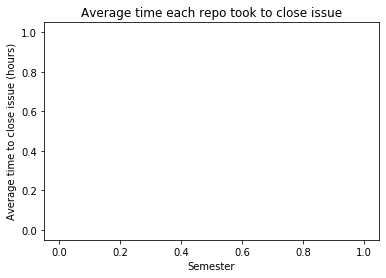

In [9]:
plt.plot(
    x_axis,
    y_axis,
    linestyle='',
    marker='o'
)
plt.xlabel('Semester')
plt.ylabel('Average time to close issue (hours)')
plt.title('Average time each repo took to close issue')